In [0]:
!pip install -U -q PyDrive

In [1]:
!pip install catboost

     |████████████████████████████████| 64.8MB 54kB/s 


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
file_id = '1CJoDAPL7S5Ym-jUinpGMAKtJFuyNx_An' # URL id. 
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('test_processed.csv')
df_submit = pd.read_csv('test_processed.csv')

In [0]:
file_id = '1sMzBtIKoOUQy2xWALjM3JmKYULvBwl2M' # URL id. 
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('train_processed.csv')
df_train = pd.read_csv('train_processed.csv')

In [7]:
!ls

adc.json  sample_data  test_processed.csv  train_processed.csv


In [0]:
df_tmp = df_train.drop(['Unnamed: 0','id','center_id', 'meal_id',
       'city_code', 'region_code', 'city_region', 'city_code_encoded', 'region_code_encoded',
       'center_type', 'category', 'cuisine','num_orders'], axis=1)

In [37]:
df_tmp.columns

Index(['week', 'checkout_price', 'base_price', 'emailer_for_promotion',
       'homepage_featured', 'op_area', 'discount', 'rate_of_discount',
       'week_sin', 'week_cos', 'center_id_encoded', 'meal_id_encoded',
       'city_region_encoded', 'center_type_encoded', 'category_encoded',
       'cuisine_encoded', 'num_orders_log1p', 'Quarter', 'Year'],
      dtype='object')

In [0]:
cat_cols_catboost = ['emailer_for_promotion',
                     'homepage_featured',
                     'city_region_encoded',
                     'center_type_encoded',
                     'category_encoded',
                     'cuisine_encoded',
                    'Quarter',
                    'Year'
                    ]
cat_cols_catboost_ = ['meal_id_encoded',
                     'center_id_encoded',
                     'emailer_for_promotion',
                     'homepage_featured',
                     'city_region_encoded',
                     'center_type_encoded',
                     'category_encoded',
                     'cuisine_encoded',
                    'Quarter',
                    'Year'
                    ]                    

In [0]:
y = df_tmp['num_orders_log1p']
X = df_tmp.drop('num_orders_log1p', axis=1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.03, 
                                                    shuffle=False)

In [0]:
model = CatBoostRegressor(cat_features = cat_cols_catboost, eval_metric='MSLE', 
                         # ignored_features = ['week','week_cos','center_id_encoded','meal_id_encoded','checkout_price','discount'], 
                          ignored_features = ['week','week_cos'], 
                          early_stopping_rounds=500)

In [42]:
model.fit(X, y, cat_features = cat_cols_catboost)

Learning rate set to 0.116088
0:	learn: 0.0403964	total: 632ms	remaining: 10m 31s
1:	learn: 0.0358911	total: 1.19s	remaining: 9m 52s
2:	learn: 0.0322551	total: 1.53s	remaining: 8m 30s
3:	learn: 0.0292148	total: 1.94s	remaining: 8m 2s
4:	learn: 0.0268147	total: 2.38s	remaining: 7m 54s
5:	learn: 0.0248156	total: 2.87s	remaining: 7m 54s
6:	learn: 0.0232069	total: 3.29s	remaining: 7m 46s
7:	learn: 0.0218978	total: 3.7s	remaining: 7m 38s
8:	learn: 0.0208091	total: 4.07s	remaining: 7m 28s
9:	learn: 0.0198588	total: 4.49s	remaining: 7m 24s
10:	learn: 0.0190912	total: 4.89s	remaining: 7m 19s
11:	learn: 0.0184580	total: 5.32s	remaining: 7m 18s
12:	learn: 0.0179295	total: 5.67s	remaining: 7m 10s
13:	learn: 0.0174712	total: 6.14s	remaining: 7m 12s
14:	learn: 0.0170801	total: 6.59s	remaining: 7m 12s
15:	learn: 0.0167433	total: 7.06s	remaining: 7m 14s
16:	learn: 0.0164528	total: 7.47s	remaining: 7m 11s
17:	learn: 0.0161666	total: 7.96s	remaining: 7m 14s
18:	learn: 0.0158942	total: 8.38s	remaining: 

In [0]:
#grid = GridSearchCV(estimator=model, param_grid = params, cv = 3, n_jobs=-1, verbose = 10)
#grid.fit(X_train, y_train)

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")
print("\n The best estimator across ALL searched params:\n",
      grid.best_estimator_)
print("\n The best score across ALL searched params:\n",
      grid.best_score_)
print("\n The best parameters across ALL searched params:\n",
      grid.best_params_)
print("\n ========================================================")

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  6.4min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 52.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 75.9min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 98.8min


In [0]:
y_predict = model.predict(X_test)
y_predict = np.expm1(y_predict)

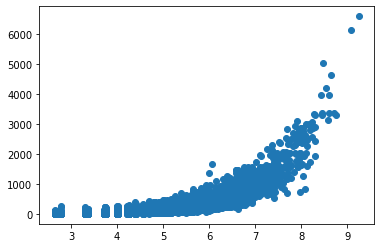

In [44]:
plt.scatter(y_test, y_predict)

In [45]:
y_pred_s = pd.Series(y_predict)
count, division = np.histogram(y_pred_s)
print(f"Data_Slice: {division}")
print(f"Count: {count}")
y_pred_s.describe()

Data_Slice: [  13.98642344  672.23502115 1330.48361885 1988.73221656 2646.98081426
 3305.22941197 3963.47800967 4621.72660738 5279.97520508 5938.22380279
 6596.47240049]
Count: [12652   835   135    41    20     8     2     2     0     2]


count    13697.000000
mean       243.391320
std        332.755758
min         13.986423
25%         57.455836
50%        127.444384
75%        296.827964
max       6596.472400
dtype: float64

In [46]:
y_pred_less_than_0 = y_pred_s[y_pred_s < 0]
print(y_pred_less_than_0.values)

[]


In [0]:
# negative requirement doesn't mean anything.
y_predict[y_predict < 0] = 0

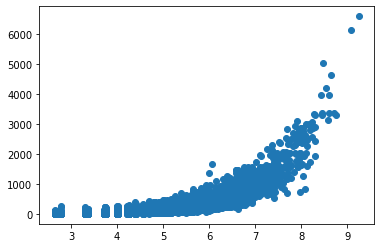

In [48]:
plt.scatter(y_test, y_predict)

In [49]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error( y_test, y_predict ))

3.286847823188102

In [0]:
df_tmp = df_submit.drop(['Unnamed: 0','id','center_id', 'meal_id',
       'city_code', 'region_code', 'city_region', 'city_code_encoded', 'region_code_encoded',
       'center_type', 'category', 'cuisine'], axis=1)

In [51]:
df_tmp.columns

Index(['week', 'checkout_price', 'base_price', 'emailer_for_promotion',
       'homepage_featured', 'op_area', 'discount', 'rate_of_discount',
       'week_sin', 'week_cos', 'center_id_encoded', 'meal_id_encoded',
       'city_region_encoded', 'center_type_encoded', 'category_encoded',
       'cuisine_encoded', 'Quarter', 'Year'],
      dtype='object')

In [0]:
y_predict = model.predict(df_tmp)
y_predict = np.expm1(y_predict)

In [0]:
# negative requirement doesn't mean anything.
y_predict[y_predict < 0] = 0

In [0]:
submission_df = df_submit.copy()
submission_df['num_orders'] = y_predict
submission_df = submission_df[['id', 'num_orders']]
submission_df.to_csv('submission_log_1.csv', index=False)

In [0]:
with open('/content/gdrive/My Drive/submission_1.csv', 'w') as f:
  f.write('content')

In [57]:
!cp submission_1.csv "drive/My Drive/data"

cp: cannot create regular file 'drive/My Drive/data': No such file or directory


In [0]:
from google.colab import files
files.download('submission_log_1.csv')